In [1]:
#Import modules #Run this once

import numpy as np
import pandas as pd
import os.path
from pylab import *
import glob
import os
import re
from xlwt import Workbook
from scipy.optimize import curve_fit
global pointnumber
from numpy import sqrt, pi, exp, linspace, loadtxt
from lmfit import  Model, Parameter, Parameters
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Run this to make sure you are in the main folder
parentdir = os.getcwd()
os.chdir(r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S105d15May17_60.5%635_A1_CuAzu655')
homedir = os.getcwd()
print('The working directory is parentdir: %s' %parentdir)
print('The data directory is homedir: %s' %homedir)

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis
The data directory is homedir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S105d15May17_60.5%635_A1_CuAzu655


## Run Analysis_bis.py

In [76]:
#Run this once to run the .py file.
os.chdir(parentdir)
!python Analysis_bis.py
%run Analysis_bis.py

In [74]:
foldername = homedir
df_datn_emplot, df_FCS, folder = dir_mV_molNo(foldername)
df_datn_emplot.head(4)
# df_datn_emplot['filepath[.datn]'][0]
df_FCS.head(4)

,Point number,Potential,filename[FCS],filepath[FCS]
0,9.0,25.0,Point_A1_025mV(6)_60.5_390s_9_FCS1.dat,/home/biswajit/Research/Reports_ppt/reports/Az...
1,21.0,75.0,Point_A1_075mV(9)_60.5_900sSpecialReactivation...,/home/biswajit/Research/Reports_ppt/reports/Az...
2,13.0,25.0,Point_A1_025mV(6)_60.5_1200s_13_FCS1_part1.dat,/home/biswajit/Research/Reports_ppt/reports/Az...
3,11.0,25.0,Point_A1_025mV(6)_60.5_240s_11_FCS1_Part1.dat,/home/biswajit/Research/Reports_ppt/reports/Az...


In [1]:
def get_point_file(foldername= homedir, input_potential=[0, 25, 50, 100], pointnumbers=[1]):
    """bin=1 in millisecond
    foldername should be given as r'D:\Research\...'
    """
    df_datn_emplot, df_FCS, folder = dir_mV_molNo(foldername)
    df_specific = df_datn_emplot[df_datn_emplot['Point number'].isin(pointnumbers)]#keep all the points that exist
    df_specific = df_specific[df_specific['Potential'].isin(input_potential)]; df_specific.reset_index(drop=True, inplace=True)

    df_specific_fcs = df_FCS[df_FCS['Point number'].isin(pointnumbers)]#keep all the points that exist
    df_specific_fcs = df_specific_fcs[df_specific_fcs['Potential'].isin(input_potential)]; df_specific_fcs.reset_index(drop=True, inplace=True)
    for i in range(len(df_specific)):
        given_potential = df_specific['Potential'][i]
        df_specific_V = df_specific[df_specific['Potential'] == given_potential]
        f_datn_path = df_specific_V['filepath[.datn]'].values[0]
        f_emplot_path = df_specific_V['filepath[.em.plot]'].values[0]
    for i in range(len(df_specific_fcs)):
        given_potential = df_specific_fcs['Potential'][i]
        df_specific_fcs_V = df_specific_fcs[df_specific_fcs['Potential'] == given_potential]
        f_fcs_path = df_specific_fcs_V['filepath[FCS]'].values[0]
    return(f_datn_path, f_emplot_path, f_fcs_path)

NameError: name 'foldername' is not defined

## 25 mV

### Point_13: 1200 s

25.0


/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


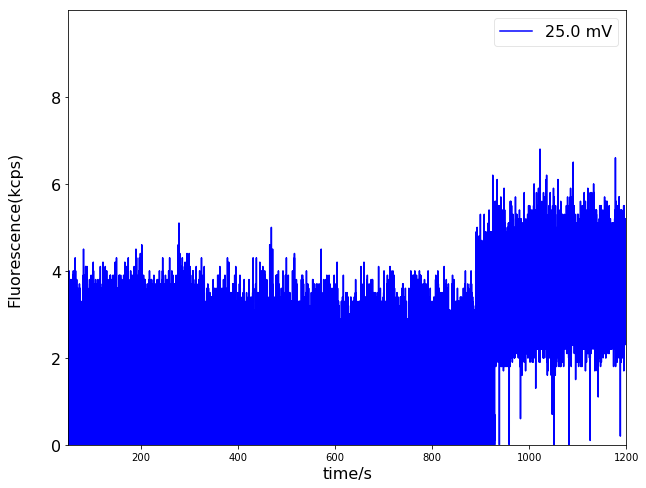

In [79]:
fig_tot = time_trace_plot(foldername= homedir, input_potential=[0, 25, 50, 75,100], pointnumbers=[13],
                      x_lim_min=50, y_lim_min=0, x_lim_max=1200, y_lim_max=10, bin=10, show_changepoint=False)

### Point_5: 480 s

25.0


/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


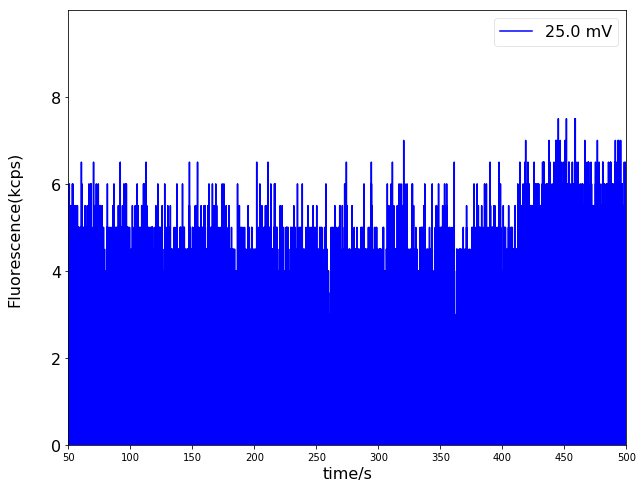

In [143]:
fig_tot = time_trace_plot(foldername= homedir, input_potential=[25], pointnumbers=[5],
                      x_lim_min=50, y_lim_min=0, x_lim_max=500, y_lim_max=10, bin=2, show_changepoint=False)

(0, 0.3)

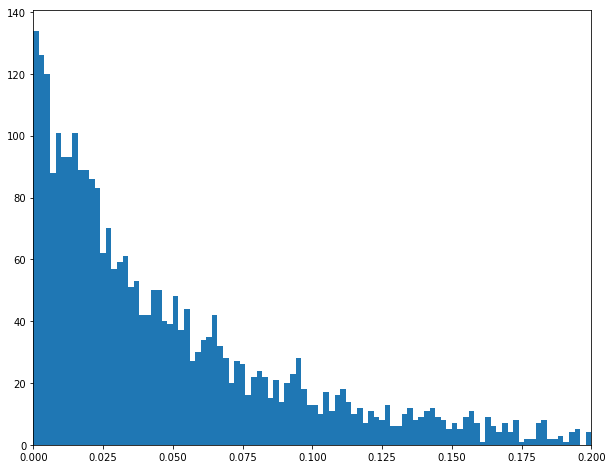

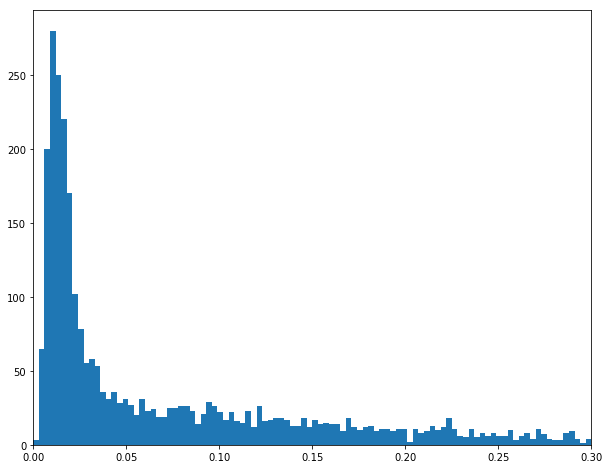

In [149]:
f_datn_path, f_emplot_path, f_fcs_path = get_point_file(foldername= homedir, input_potential=[25], pointnumbers=[5])

df_ton, df_toff, average_ton, average_toff = t_on_off(f_datn_path, f_emplot_path)
figure(figsize=(10,8))
hist(df_ton, bins=100,range=(0, 0.2));
xlim(0, 0.2)
figure(figsize=(10,8))
hist(df_toff,bins=100,range=(0, 0.3));
# xscale('log')
xlim(0, 0.3)

## 50 mV

### Point_14

50.0


/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


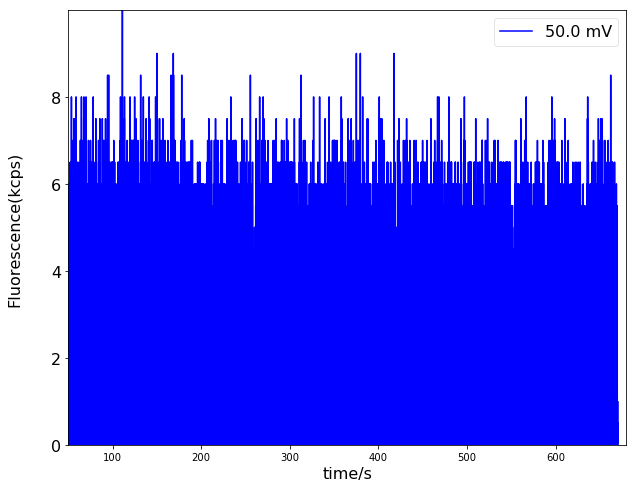

In [63]:
fig_tot = time_trace_plot(foldername= homedir, input_potential=[0, 25, 50, 75,100], pointnumbers=[14],
                      x_lim_min=50, y_lim_min=0, x_lim_max=680, y_lim_max=10, bin=2, show_changepoint=False)

50.0


/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


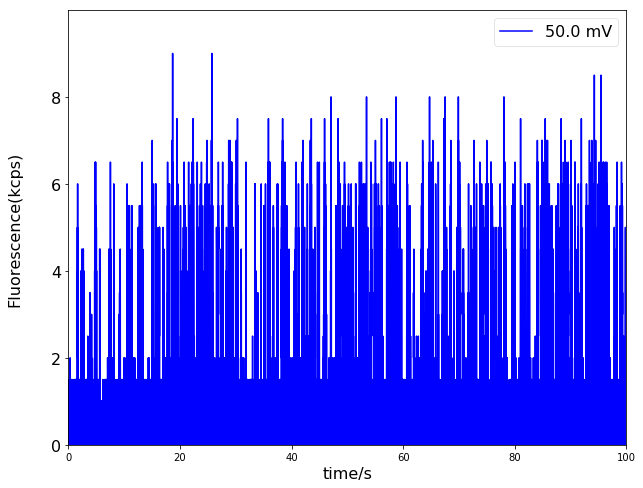

In [85]:
fig_part = time_trace_plot(foldername= homedir, input_potential=[0, 25, 50, 75,100], pointnumbers=[14],
                      x_lim_min=0, y_lim_min=0, x_lim_max=100, y_lim_max=10, bin=2, show_changepoint=False)

(0, 0.02)

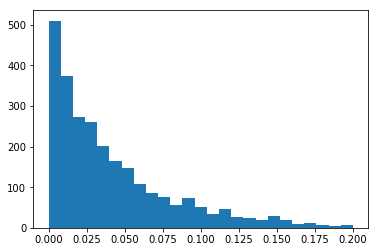

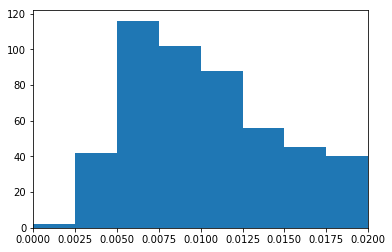

In [123]:
f_datn_path, f_emplot_path, f_fcs_path = get_point_file(foldername= homedir, input_potential=[0, 25, 50, 100], pointnumbers=[14])
df_ton, df_toff, average_ton, average_toff = t_on_off(f_datn_path, f_emplot_path)
hist(df_ton, bins=25,range=(0, 0.2));
figure()
hist(df_toff,bins=200,range=(0, 0.5));
# xscale('log')
xlim(0, 0.02)

## 75 mV

### Point_22: 120 sec

75.0


/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


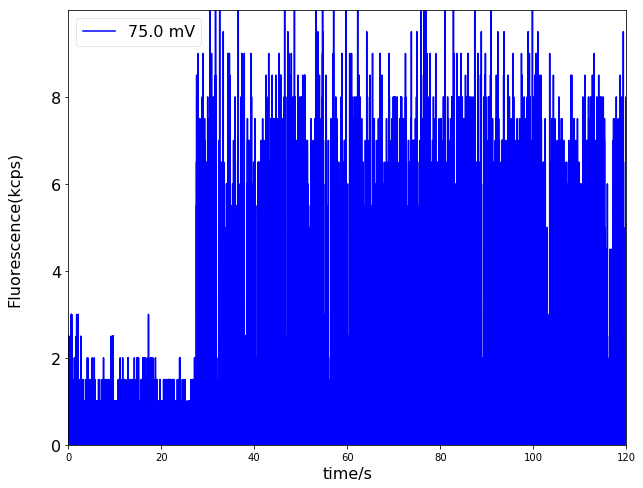

In [92]:
fig = time_trace_plot(foldername= homedir, input_potential=[0, 25, 50, 75,100], pointnumbers=[22],
                      x_lim_min=00, y_lim_min=0, x_lim_max=120, y_lim_max=10, bin=2, show_changepoint=False)

(0, 0.1)

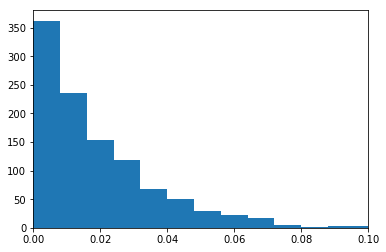

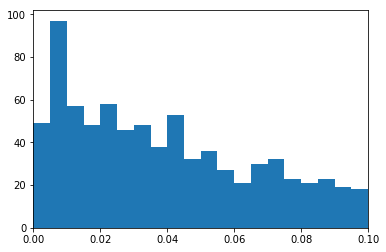

In [141]:
f_datn_path, f_emplot_path, f_fcs_path = get_point_file(foldername= homedir, input_potential=[0, 25, 50, 75, 100], pointnumbers=[22])
df_ton, df_toff, average_ton, average_toff = t_on_off(f_datn_path, f_emplot_path)
hist(df_ton, bins=25,range=(0, 0.2));
xlim(0, 0.1)
figure()
hist(df_toff,bins=100,range=(0, 0.5));
# xscale('log')
xlim(0, 0.1)

## 100 mV

### Point_24: 1200s

100.0


/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


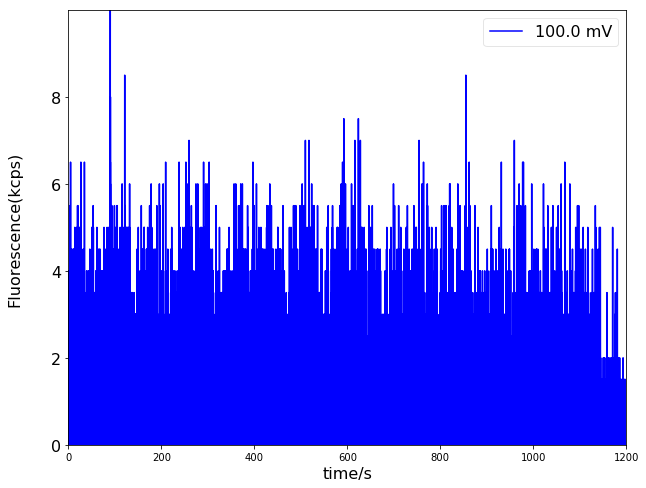

In [130]:
fig = time_trace_plot(foldername= homedir, input_potential=[100], pointnumbers=[24],
                      x_lim_min=00, y_lim_min=0, x_lim_max=1200, y_lim_max=10, bin=2, show_changepoint=False)

(0, 0.5)

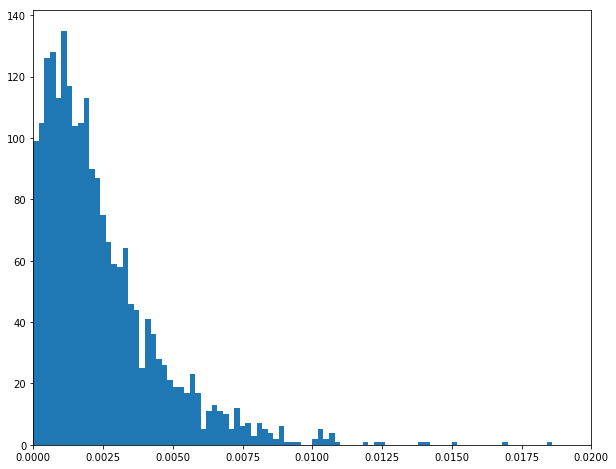

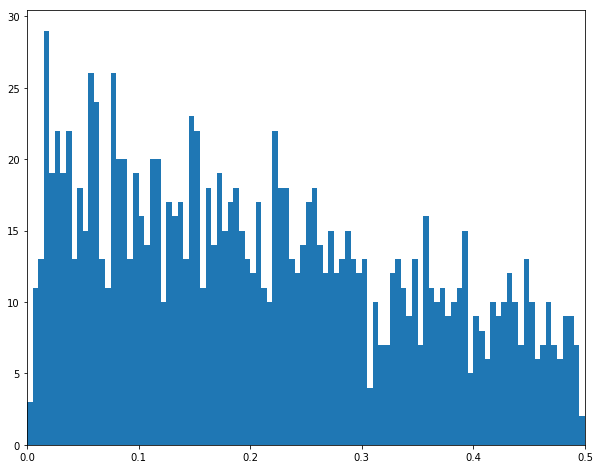

In [139]:
f_datn_path, f_emplot_path, f_fcs_path = get_point_file(foldername= homedir, input_potential=[100], pointnumbers=[24])
df_ton, df_toff, average_ton, average_toff = t_on_off(f_datn_path, f_emplot_path)
figure(figsize=(10,8))
hist(df_ton, bins=100,range=(0, 0.02));
xlim(0, 0.02)
figure(figsize=(10,8))
hist(df_toff,bins=100,range=(0, 0.5));
# xscale('log')
xlim(0, 0.5)